# What sells a car?

I'm an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on our site every day. I
need to study data collected over the last few years and determine which factors influence the price of a vehicle.

In the project, I have three main objects to study: cars, their price, and advertisements for their sale.\
First, I'm going to look at the basic parameters of cars: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition.\
Then I'll take a closer look at the ads, study "the duration of their life", and check the most popular ones.\
After that, I will move on to the price and study what characteristics and how they can influence it.

## Initialization

As always beginning with tools.

In [1]:
# Loading all the libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import pandas as pd
import numpy as np
import datetime as dt
import scipy.stats as stats
import statistics as st
import sidetable
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [2]:
#pip install sidetable

### Load data

In [3]:
# Load the data file into a DataFrame

path_h = "/Users/victo/Downloads/vehicles_us.csv"
path = '/datasets/vehicles_us.csv'

try:
    df = pd.read_csv(path_h, sep = ',')
except:
    df = pd.read_csv(path, sep = ',')


### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal


In [4]:
# print the general/summary information about the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Not bad. Only 5 columns out of 13 have missing values. Let's take a look at the table.\
Also, it asks to change the data type in all numeric columns to an integer. Well, the data type in date_posted must be changed to date.

In [5]:
# print a sample of data

df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


At first sight - haven't problems (except missing values). Let's see what's under the hood.

In [6]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


It becomes interesting, there is something to see. Let's start with missing values.

In [7]:
df.stb.missing(clip_0=True, style=True)

,missing,total,percent
is_4wd,"25,953","51,525",50.37%
paint_color,"9,267","51,525",17.99%
odometer,"7,892","51,525",15.32%
cylinders,"5,260","51,525",10.21%
model_year,"3,619","51,525",7.02%


In [8]:
# # let's check what values has feature is_4wd

df.is_4wd.value_counts()

1.0    25572
Name: is_4wd, dtype: int64

In [9]:
#lets see extreme values of price

df[df['price'] < 1000].stb.freq(['price'])

df[df['price'] == 375000]

,price,count,percent,cumulative_count,cumulative_percent
0,1,798,56.837607,798,56.837607
1,500,79,5.626781,877,62.464387
2,800,53,3.774929,930,66.239316
3,700,35,2.492877,965,68.732194
4,69,34,2.421652,999,71.153846
...,...,...,...,...,...
111,10,1,0.071225,1400,99.715100
112,9,1,0.071225,1401,99.786325
113,6,1,0.071225,1402,99.857550
114,5,1,0.071225,1403,99.928775


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
12504,375000,1999.0,nissan frontier,good,6.0,gas,115000.0,automatic,pickup,blue,1.0,2018-05-19,21


In [10]:
# let's see how many we have cars aged more than 50

df[df['model_year'] < 1969].groupby('model_year')['price'].count()

model_year
1908.0     2
1929.0     1
1936.0     1
1948.0     1
1949.0     1
1954.0     1
1955.0     1
1958.0     2
1960.0     3
1961.0     1
1962.0     3
1963.0     3
1964.0     7
1965.0    10
1966.0    23
1967.0     7
1968.0    16
Name: price, dtype: int64

In [11]:
# I'm dying to see what kind of rarity is on sale

df[df.model_year == 1908]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
33906,12995,1908.0,gmc yukon,good,8.0,gas,169328.0,automatic,SUV,black,NaN,2018-07-06,34
33907,12995,1908.0,cadillac escalade,excellent,8.0,gas,NaN,automatic,SUV,white,NaN,2018-06-24,25


Ohh. It's not a rarity, it's wrong of somebody - Caddilac Escalade begun manufactured in 1998 only.

In [12]:
# let's check at which year and how often we have odometer values equal 0

df[df['odometer'] == 0].stb.freq(['model_year']).sort_values(by='model_year')

df[df['odometer'] == 990000]

,model_year,count,percent,cumulative_count,cumulative_percent
32,1962.0,1,0.581395,172,100.000000
22,1966.0,2,1.162791,162,94.186047
31,1968.0,1,0.581395,171,99.418605
21,1969.0,2,1.162791,160,93.023256
30,1970.0,1,0.581395,170,98.837209
29,1971.0,1,0.581395,169,98.255814
28,1984.0,1,0.581395,168,97.674419
20,1988.0,2,1.162791,158,91.860465
27,1991.0,1,0.581395,167,97.093023
26,1992.0,1,0.581395,166,96.511628


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
17869,59900,1964.0,chevrolet corvette,like new,NaN,gas,990000.0,automatic,convertible,red,NaN,2018-06-17,28
40729,4700,2013.0,chevrolet cruze,good,6.0,gas,990000.0,automatic,sedan,black,NaN,2018-05-02,4


In [13]:
df[df['days_listed'] == 271]
df.days_listed.median()
df.days_listed.mean()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
4360,5200,2011.0,chevrolet impala,like new,6.0,gas,122000.0,automatic,sedan,NaN,NaN,2018-05-24,271


33.0

39.55475982532751

In [14]:
#and little bit more - check duplicates in Data

df.duplicated().sum()

0

### Conclusions and further steps

So. We have data with 51525 rows and 13 columns. Missing values in columns **is_4wd, paint_color, odometer, cylinders, model_year**.\
It is necessary to change the data type to integer in the columns: **model_year, cylinders, odometer, and is_4wd**. In the **date_posted** column, you need to change the data type to date.

The stat description gave a lot of interesting things.\
**Price** - I see a lot of sales (1.5% ) for 1 dollar. In addition, among the prices up to 1000 dollars, there are strange prices of 5, 6, 9, and 10 dollars among the prices. This is hardly a mistake, rather, people rely on a negotiated price, and set a small price in the hope of attracting more buyers. I also see a clear outlier (max 375,000 at Q3 16839) in price. It turned out to be a 1999 Nissan frontier, and it certainly isn't worth that much. I looked at the sales boards - you need to remove 2 zeros in the price.\
**model_year** - the presence of a model of 1908 (more than 100 years) turned out to be very strange. Usually, such machines are sold on specialized resources. When checking, it turned out that this is a Cadillac escalade, which began to be produced in 1998, so this is also a mistake.\
**odometer** - A reading of 0 looked strange. Since it occurs over many years, I will attribute this to a data entry error. We also have an outlier - the max value is 990000 with Q3 155000.\
**days_listed** also has an outlier of 271 days at Q3 53 days.

Separately, I checked the duplicates for the entire date - there are no duplicates.

What's next?
The proportion of missing values is quite large, you can't just delete them, so I'll fill them in. After that, I will double-check for duplicates and proceed to the analysis.

## Treat missing values

So, I'll start with the **model_year**, and my plan is this:
- first, using IQR I will find the min and max borders of the distribution
- after, I will get data in such borders and find the mean for each model.
- finally, based on those means I will fill in the gaps in the data

In [15]:
# at first I'll make a function that helps me with describing of IQR

def distribution_IQR(parameter):
    print('The histogram of: {}'.format(parameter))
    df[parameter].hist()
    plt.show()
    if df[parameter].mean()>df[parameter].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print('Statistics on: {}'.format(parameter))
    print(df[parameter].describe())
    Q1 = df[parameter].quantile(0.25)
    Q3 = df[parameter].quantile(0.75)
    IQR = Q3 - Q1
    min_iqr=Q1-1.5*IQR
    max_iqr=Q3+1.5*IQR
    print('---------------------------------------')
    print('min border:',min_iqr)
    print('max border:',max_iqr)
    print('---------------------------------------')
    if min_iqr<0:
        print('The outliers are considered to be values above',max_iqr)
        print('We have',len(df[df[parameter]>max_iqr]),"values that we can consider outliers")
    else:
        print('The outliers are considered to be values below',min_iqr, "and above",max_iqr)
        print('We have',len(df[(df[parameter]<min_iqr)|(df[parameter]>max_iqr)]),"values that we can consider outliers")

The histogram of: model_year


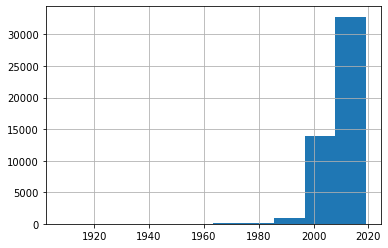

The distribution is skewed to the left
---------------------------------------
Statistics on: model_year
count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64
---------------------------------------
min border: 1994.0
max border: 2026.0
---------------------------------------
The outliers are considered to be values below 1994.0 and above 2026.0
We have 709 values that we can consider outliers


In [16]:
distribution_IQR('model_year')

Okay, we got the relevant years. So, I'm ready to take the mean for each model and fill in the missing values.\
!But\
First, I will check the values of the **model** for implicit duplicates.

In [17]:
# let's get unique values of model
np.sort(df.model.unique())

# and check a quantity
len(df.model.unique())

array(['acura tl', 'bmw x5', 'buick enclave', 'cadillac escalade',
       'chevrolet camaro', 'chevrolet camaro lt coupe 2d',
       'chevrolet colorado', 'chevrolet corvette', 'chevrolet cruze',
       'chevrolet equinox', 'chevrolet impala', 'chevrolet malibu',
       'chevrolet silverado', 'chevrolet silverado 1500',
       'chevrolet silverado 1500 crew', 'chevrolet silverado 2500hd',
       'chevrolet silverado 3500hd', 'chevrolet suburban',
       'chevrolet tahoe', 'chevrolet trailblazer', 'chevrolet traverse',
       'chrysler 200', 'chrysler 300', 'chrysler town & country',
       'dodge charger', 'dodge dakota', 'dodge grand caravan',
       'ford econoline', 'ford edge', 'ford escape', 'ford expedition',
       'ford explorer', 'ford f-150', 'ford f-250', 'ford f-250 sd',
       'ford f-250 super duty', 'ford f-350 sd', 'ford f150',
       'ford f150 supercrew cab xlt', 'ford f250', 'ford f250 super duty',
       'ford f350', 'ford f350 super duty', 'ford focus', 'ford focus

100

Have a problem with models ford f***, and I wanna change the name of the 'mercedes-benz benze sprinter 2500'

In [18]:
# let's fix the duplicates ford
df.model = df.model.str.replace('-', '')
df.model = df.model.str.replace('super duty', 'sd')

# let's fix the mercedes
df.model = df.model.str.replace('mercedesbenz', 'mercedes-benz')
df.model = df.model.str.replace(' benze ', ' ')

len(df.model.unique())

95

Ok, removed 5 duplicates, i like it.

In [19]:
# fill in missing values
df.model_year = df.model_year.fillna(df.groupby(['model'])['model_year'].transform('median'))

# at once change the data type of the column
df.model_year = df.model_year.astype('int64')

# check the result 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  int64  
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 5.1+ MB


In [20]:
df[df.model_year.isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


Next one - **cylinders**. They haven't outliers, so I'm going to get an average by a group of the **model** and the **model_year**..

In [21]:
# let's fill in values
df.cylinders.value_counts()
df.cylinders = df.cylinders.fillna(df.groupby(['model', 'model_year'])['cylinders'].transform(st.mode))
df.info()

8.0     15844
6.0     15700
4.0     13864
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  int64  
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51493 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 5.1+ MB


In [22]:
# mode didn't get all values, so let's use median
df.cylinders = df.cylinders.fillna(df.groupby(['model', 'model_year'])['cylinders'].transform('median'))

# check the number of unique values
df.cylinders.value_counts()

8.0     17623
6.0     17497
4.0     15478
10.0      573
5.0       294
3.0        34
12.0        2
7.0         1
Name: cylinders, dtype: int64

Hmm. Not all rows were filled up. Ok, I'll fill the values by previous valid observations and at once change the data type.

In [23]:
# let's make a little loop

for row in df:
    try:
        df.cylinders = df.cylinders.astype('int64')
    except:
        df.cylinders = df.groupby('model')['cylinders'].fillna(method = 'ffill')
        df.cylinders = df.cylinders.astype('int64')
        
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  int64  
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  int64  
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 5.1+ MB


Now I'm happy.

Let's come to the **odometer**. I think the values of the odometer can correlate with **model_year** and **condition**.\
And I'm again going to get an average by a group and fill in the missing.

In [24]:
#let's fill up the missing values by median
df.odometer = df.odometer.fillna(df.groupby(['model_year', 'condition'])['odometer'].transform('median'))

# check NaN values
df[df.odometer.isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
21421,4500,1974,chevrolet corvette,fair,8,gas,NaN,automatic,sedan,red,NaN,2018-12-15,18
28009,65000,1960,chevrolet corvette,like new,8,gas,NaN,manual,coupe,NaN,NaN,2018-11-03,41
31806,1700,1996,ford mustang,salvage,6,gas,NaN,manual,convertible,white,NaN,2019-03-31,46
33257,4500,1963,chevrolet impala,fair,8,gas,NaN,automatic,sedan,NaN,NaN,2019-03-17,38
33907,12995,1908,cadillac escalade,excellent,8,gas,NaN,automatic,SUV,white,NaN,2018-06-24,25
45694,18000,1929,ford f150,good,8,gas,NaN,manual,other,silver,NaN,2018-11-18,59
46911,22300,2003,chevrolet corvette,new,8,gas,NaN,manual,convertible,black,NaN,2018-11-08,23


Better, but anyway have a bit of rows with Nan value. Ok, let's take that the cars of the same year have the same mileage. For this reason, get the average odometer per year and fill rows manually. 

In [25]:
df.odometer = df.odometer.fillna(df.groupby(['model_year'])['odometer'].transform('median'))
df[df.odometer.isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
45694,18000,1929,ford f150,good,8,gas,NaN,manual,other,silver,NaN,2018-11-18,59


In [26]:

df.loc[45694,'odometer'] = df.query('model_year == 1936').odometer.median()
df[df.odometer.isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


And now, let's change the data type.

In [27]:
for row in df:
    try:
        df['odometer'] = df['odometer'].astype('int64')
    except:
        df['odometer'] = df.groupby('condition')['odometer'].fillna(method = 'ffill')
        df['odometer'] = df['odometer'].astype('int64')
        
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  int64  
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  int64  
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  int64  
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 5.1+ MB


Ok. Moving on.

Next - is color. In this case, I'll use a simple approach, and fill up all missing values with the value "other".\
Sure, we could take a statistic of sales cars, and find the most popular color in a slice of model and years. But in this case, I think this is will be overkill.

In [28]:
df.paint_color = df.paint_color.fillna(value = 'other')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  int64  
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  int64  
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  int64  
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 5.1+ MB


And the last one is the missing value column **is_4wd**. I'll just fill up the missing values by a 0.

In [29]:
df.is_4wd = df.is_4wd.fillna(value = 0)
df.is_4wd = df.is_4wd.astype('bool')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         51525 non-null  int64 
 1   model_year    51525 non-null  int64 
 2   model         51525 non-null  object
 3   condition     51525 non-null  object
 4   cylinders     51525 non-null  int64 
 5   fuel          51525 non-null  object
 6   odometer      51525 non-null  int64 
 7   transmission  51525 non-null  object
 8   type          51525 non-null  object
 9   paint_color   51525 non-null  object
 10  is_4wd        51525 non-null  bool  
 11  date_posted   51525 non-null  object
 12  days_listed   51525 non-null  int64 
dtypes: bool(1), int64(5), object(7)
memory usage: 4.8+ MB


Well, I filled up all the missing values. Great.

Now, I wanna check implicit duplicates in categorical values in the next column: 'condition', 'fuel', 'transmission', 'type', and 'paint_color'.

In [30]:
columns_for_check = ['condition', 'fuel', 'transmission', 'type', 'paint_color' ]

for i in columns_for_check:
    np.sort(df[i].unique())

array(['excellent', 'fair', 'good', 'like new', 'new', 'salvage'],
      dtype=object)

array(['diesel', 'electric', 'gas', 'hybrid', 'other'], dtype=object)

array(['automatic', 'manual', 'other'], dtype=object)

array(['SUV', 'bus', 'convertible', 'coupe', 'hatchback', 'mini-van',
       'offroad', 'other', 'pickup', 'sedan', 'truck', 'van', 'wagon'],
      dtype=object)

array(['black', 'blue', 'brown', 'custom', 'green', 'grey', 'orange',
       'other', 'purple', 'red', 'silver', 'white', 'yellow'],
      dtype=object)

Well, after all the manipulations, it remains to check the duplicates in the data again.

In [31]:
df.duplicated().sum()

0

Ok. I haven't implicit duplicates and duplicates at all. One more, what I wanna do in this part of the project - is changing the type of data in column date_posted.

In [32]:
df.date_posted = pd.to_datetime(df.date_posted)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int64         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(5), object(6)
memory usage: 4.8+ MB


**Intermediate conclusion**\
So, we filled in all the missing values and changed the data types to the correct ones. Removed implicit duplicates in models, and checked for their presence in categorical values.\
Now, it's time to add the necessary values that will help us further when exploring the data.

In [33]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,other,True,2018-06-23,19
1,25500,2011,ford f150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79
3,1500,2003,ford f150,fair,8,gas,193850,automatic,pickup,other,False,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28


## Enrich data

Let's add additional factors to the data to make the analysis easier.

In [34]:
# let's add datetime values for when the ad was placed

df['day_of_week'] = df.date_posted.dt.day_name()
df['month_posted'] = df.date_posted.dt.month
df['year_posted'] = df.date_posted.dt.year

In [35]:
# let's add the vehicle's age when the ad was placed

df['age_when_posted'] = df.year_posted - df.model_year
df.age_when_posted = df.age_when_posted.astype('int64')
df.age_when_posted.describe()

count    51525.000000
mean         8.511014
std          6.112979
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: age_when_posted, dtype: float64

In [36]:
# let's count average mileage per year

df.loc[df['age_when_posted'] != 0,'avg_mile_year'] = df.odometer/df.age_when_posted
df.loc[df['age_when_posted'] == 0,'avg_mile_year'] = df.odometer
df.avg_mile_year = df.avg_mile_year.astype(np.int64)

In [37]:
df.avg_mile_year.describe()

len(df.loc[(df['avg_mile_year'] == 0) & (df['odometer'] != 0)])

count     51525.000000
mean      17735.385832
std       12451.715066
min           0.000000
25%       10909.000000
50%       15215.000000
75%       21285.000000
max      373200.000000
Name: avg_mile_year, dtype: float64

35

I was interested in the minimum average mileage equal to 0. I decided to check if there are such values when the odometer reading is not equal to 0.\
They are, and they arise when dividing the odometer value by age, we get a number less than one. When we change the data type to integer, they become 0.\
There are not many of them - 35 (0.07%), I will not change them to 1.

In [38]:
# let's replace the string values of the conditions with a numeric scale that can be manipulated more easily.

condition_dict = {'new' : 5,
                  'like new' : 4,
                  'excellent' : 3,
                  'good' : 2,
                  'fair' : 1,
                  'salvage' : 0
}

df['condition_id'] = df.condition.map(condition_dict)

# let's check 
df.query('condition_id == 5')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_week,month_posted,year_posted,age_when_posted,avg_mile_year,condition_id
470,34000,2016,chevrolet camaro,new,8,gas,3396,automatic,coupe,red,False,2018-12-17,14,Monday,12,2018,2,1698,5
663,30000,2018,toyota highlander,new,6,gas,6893,automatic,SUV,white,False,2018-07-14,24,Saturday,7,2018,0,6893,5
833,44505,2019,dodge charger,new,8,gas,202,automatic,sedan,black,False,2019-02-06,44,Wednesday,2,2019,0,202,5
901,23000,2018,honda civic,new,4,gas,13800,automatic,hatchback,other,False,2018-08-18,25,Saturday,8,2018,0,13800,5
1974,7000,2009,chevrolet silverado 1500,new,8,gas,194700,automatic,truck,white,True,2018-11-04,17,Sunday,11,2018,9,21633,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49458,6800,2016,hyundai elantra,new,4,gas,69000,automatic,sedan,other,False,2018-12-12,18,Wednesday,12,2018,2,34500,5
49816,8200,2008,toyota tacoma,new,6,gas,234000,automatic,truck,silver,True,2018-09-20,27,Thursday,9,2018,10,23400,5
50077,19000,2018,honda civic,new,4,gas,12632,automatic,sedan,other,False,2018-10-04,15,Thursday,10,2018,0,12632,5
50113,66000,2018,ford f250,new,8,diesel,22000,automatic,truck,white,True,2018-07-19,4,Thursday,7,2018,0,22000,5


Weird. We have listings where the condition says "new", but the mileage is over 25 miles. Moreover, the maximum value is 234000. This is most likely an error during filling, so i will change to condition 'like new'.

In [39]:
df.loc[(df['condition_id'] == 5) & (df['odometer'] > 25),'odometer'] = 4
df.loc[(df['condition'] == 'new') & (df['odometer'] > 25),'odometer'] = 'like new'
df.query('condition_id == 5')['odometer'].value_counts()

4     109
7      17
5       9
20      3
21      1
23      1
8       1
25      1
10      1
Name: odometer, dtype: int64

## Check clean data

In [40]:
# print the general/summary information about the DataFrame

df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            51525 non-null  int64         
 1   model_year       51525 non-null  int64         
 2   model            51525 non-null  object        
 3   condition        51525 non-null  object        
 4   cylinders        51525 non-null  int64         
 5   fuel             51525 non-null  object        
 6   odometer         51525 non-null  object        
 7   transmission     51525 non-null  object        
 8   type             51525 non-null  object        
 9   paint_color      51525 non-null  object        
 10  is_4wd           51525 non-null  bool          
 11  date_posted      51525 non-null  datetime64[ns]
 12  days_listed      51525 non-null  int64         
 13  day_of_week      51525 non-null  object        
 14  month_posted     51525 non-null  int64

,count,mean,std,min,25%,50%,75%,max
price,51525.0,12132.464920,10040.803015,1.0,5000.0,9000.0,16839.0,375000.0
model_year,51525.0,2009.796448,6.099229,1908.0,2007.0,2011.0,2014.0,2019.0
cylinders,51525.0,6.120349,1.657632,3.0,4.0,6.0,8.0,12.0
days_listed,51525.0,39.554760,28.204270,0.0,19.0,33.0,53.0,271.0
month_posted,51525.0,6.628491,3.474134,1.0,3.0,7.0,10.0,12.0
year_posted,51525.0,2018.307462,0.461447,2018.0,2018.0,2018.0,2019.0,2019.0
age_when_posted,51525.0,8.511014,6.112979,0.0,4.0,7.0,12.0,110.0
avg_mile_year,51525.0,17735.385832,12451.715066,0.0,10909.0,15215.0,21285.0,373200.0
condition_id,51525.0,2.637535,0.712447,0.0,2.0,3.0,3.0,5.0


In [41]:
# we have a 'day_listed' value of 0, which means this ad was posted on the day the data was collected.
# I want to see how many there were.

len(df[df['days_listed'] == 0])

54

In [42]:
# again check duplicates
df.duplicated().sum()

0

In [43]:
# print a sample of data

df.head(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_week,month_posted,year_posted,age_when_posted,avg_mile_year,condition_id
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,other,True,2018-06-23,19,Saturday,6,2018,7,20714,2
1,25500,2011,ford f150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,Friday,10,2018,7,12672,2
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,Thursday,2,2019,6,18333,4
3,1500,2003,ford f150,fair,8,gas,193850,automatic,pickup,other,False,2019-03-22,9,Friday,3,2019,16,12115,1
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,Tuesday,4,2019,2,40451,3
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,Wednesday,6,2018,4,14488,3
6,12990,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,Thursday,12,2018,3,26404,3
7,15990,2013,honda pilot,excellent,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,Monday,1,2019,6,18245,3
8,11500,2012,kia sorento,excellent,4,gas,104174,automatic,SUV,other,True,2018-07-16,19,Monday,7,2018,6,17362,3
9,9200,2008,honda pilot,excellent,6,gas,147191,automatic,SUV,blue,True,2019-02-15,17,Friday,2,2019,11,13381,3


Well. The data is correct, there are no missing data or duplicates.

## Study core parameters

Now, I'm going to analyze the next parameters:

- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

For this, I'll use the function distribution_percentile() and loop.

In [44]:
def distribution_percentile(parameter):
    print('The histogram of: {}'.format(parameter))
    df[parameter].hist()
    plt.show()
    if df[parameter].mean()>df[parameter].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print('Statistics on: {}'.format(parameter))
    print(df[parameter].describe())
    #data[parameter].describe()
    ninety_eight = np.percentile(df[parameter], 98)
    two = np.percentile(df[parameter], 2)
    print('---------------------------------------')
    print('min border:',two)
    print('max border:',ninety_eight)
    print('---------------------------------------')
    print('The outliers are considered to be values below',two, "and above",ninety_eight)
    print('We have',len(df[(df[parameter]<two)|(df[parameter]>ninety_eight)]),"values that we can consider outliers")

The histogram of: price


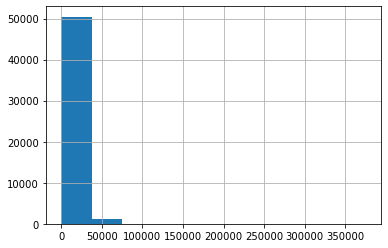

The distribution is skewed to the right
---------------------------------------
Statistics on: price
count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64
---------------------------------------
min border: 371.48
max border: 37995.0
---------------------------------------
The outliers are considered to be values below 371.48 and above 37995.0
We have 2059 values that we can consider outliers


The histogram of: age_when_posted


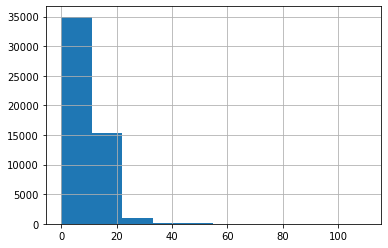

The distribution is skewed to the right
---------------------------------------
Statistics on: age_when_posted
count    51525.000000
mean         8.511014
std          6.112979
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: age_when_posted, dtype: float64
---------------------------------------
min border: 0.0
max border: 23.0
---------------------------------------
The outliers are considered to be values below 0.0 and above 23.0
We have 887 values that we can consider outliers


The histogram of: avg_mile_year


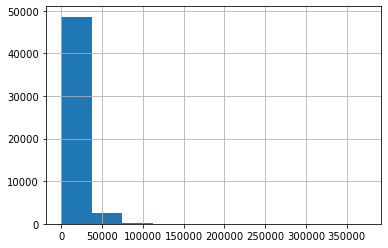

The distribution is skewed to the right
---------------------------------------
Statistics on: avg_mile_year
count     51525.000000
mean      17735.385832
std       12451.715066
min           0.000000
25%       10909.000000
50%       15215.000000
75%       21285.000000
max      373200.000000
Name: avg_mile_year, dtype: float64
---------------------------------------
min border: 1031.44
max border: 51077.67999999997
---------------------------------------
The outliers are considered to be values below 1031.44 and above 51077.67999999997
We have 2062 values that we can consider outliers


The histogram of: cylinders


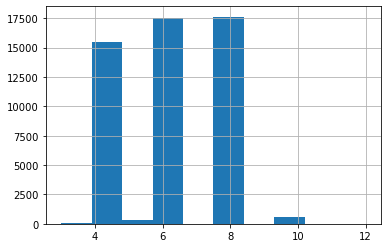

The distribution is skewed to the right
---------------------------------------
Statistics on: cylinders
count    51525.000000
mean         6.120349
std          1.657632
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64
---------------------------------------
min border: 4.0
max border: 8.0
---------------------------------------
The outliers are considered to be values below 4.0 and above 8.0
We have 609 values that we can consider outliers


The histogram of: condition_id


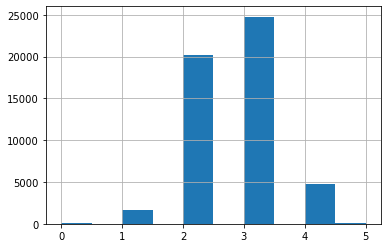

The distribution is skewed to the left
---------------------------------------
Statistics on: condition_id
count    51525.000000
mean         2.637535
std          0.712447
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition_id, dtype: float64
---------------------------------------
min border: 1.0
max border: 4.0
---------------------------------------
The outliers are considered to be values below 1.0 and above 4.0
We have 258 values that we can consider outliers




In [45]:
# make a list of parameters.

list_parameters = ['price', 'age_when_posted', 'avg_mile_year', 'cylinders', 'condition_id']

for i in list_parameters:
    distribution_percentile(i)
    print()
    print()


In [46]:
df[['price', 'age_when_posted', 'avg_mile_year', 'cylinders', 'condition_id']].corr()

,price,age_when_posted,avg_mile_year,cylinders,condition_id
price,1.000000,-0.411523,0.197152,0.296526,0.221518
age_when_posted,-0.411523,1.000000,-0.481544,0.152101,-0.268968
avg_mile_year,0.197152,-0.481544,1.000000,-0.043306,0.057957
cylinders,0.296526,0.152101,-0.043306,1.000000,-0.067008
condition_id,0.221518,-0.268968,0.057957,-0.067008,1.000000


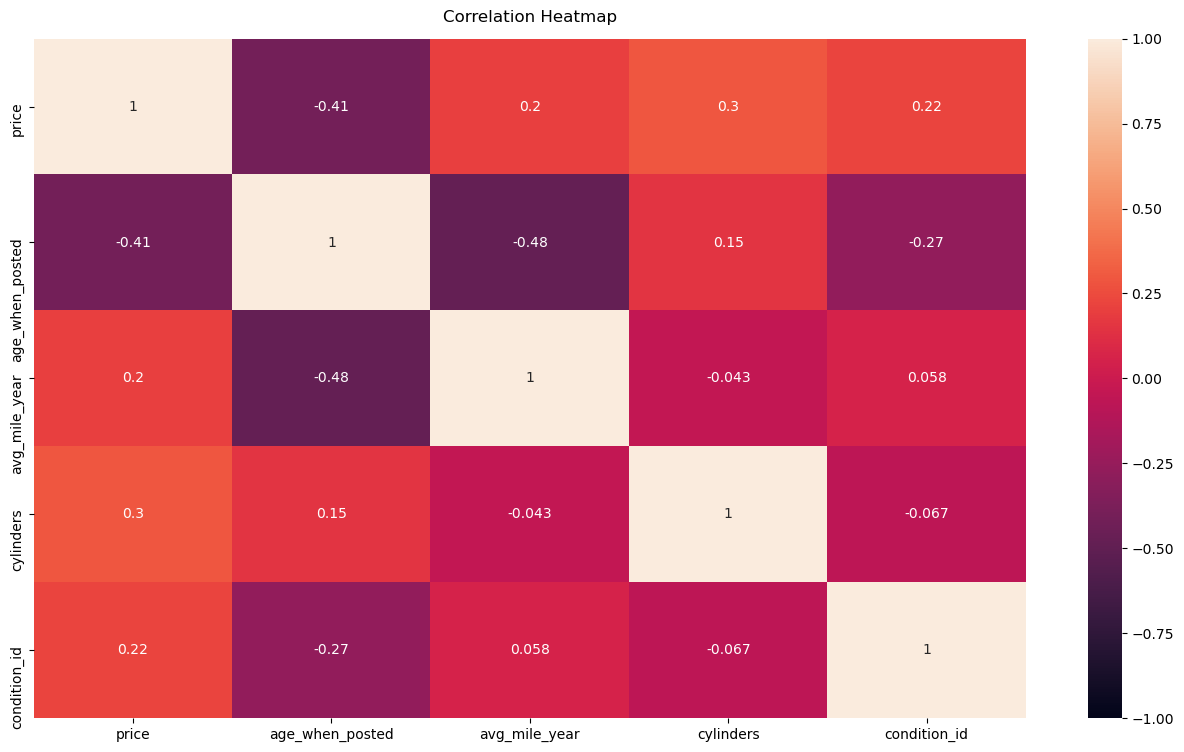

In [47]:

figure(figsize=(16, 9), dpi=100)
heatmap = sns.heatmap(df[['price', 'age_when_posted', 'avg_mile_year', 'cylinders', 'condition_id']].corr(), vmin=-1, vmax=1, annot=True) 
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# **Conclusion.**

**Price.**\
The distribution is strongly skewed to the right due to the outlier of 375000. The price also has abnormally small values. Considering that most of them are listed in excellent condition, I think the low price is to attract a buyer and start a conversation.\
Most of the prices are in the range of up to 50,000. The peak of the histogram is around 5000, with an average value of 9,000.
In general, the site sells cars in cheap and medium-price segments.

**Machine age.**\
The distribution is also heavily skewed to the right, due to pseudo-old cars.\
The baseline age ranges from 0 to 23 years old, with a mean of 8 years.

**Mileage.**\
And again, the distribution is skewed to the right, but not as pronounced as in the previous graphs, the median, and the mean almost coincide.\
Base mileage ranges from 1,031 to 51,078, with an average of 17,735 miles.

**A number of cylinders.**\
There is also a very small skewed to the right, and the average (6.11) practically coincides with the median (6.0).
The site sells cars with 4, 6, and 8 cylinders.

**Condition.**\
This is the only distribution of those considered - with a skewed to the left. The bulk of the values lies in the range from 1 to 4 (from good to almost new). With an average value of 3 (excellent).

**Heatmap\correlation.**\

The number of cylinders positively affects the price (0.48). The age of the car affects the price negatively (-0.41).
Also, the age of the car is negatively correlated with the average mileage (-0.48), and with condition (-0.27).
All this looks logical.

In general, the price? age of the car and mileage have a lot of outliers that should be removed.



## Study and treat outliers



In [48]:
# Let's create a data frame with boundary indicators of outliers and
# an indicator of their share in% of the total number of values.

border_list = []
for parameter in list_parameters:
    ninety_eight = np.percentile(df[parameter], 98)
    two = np.percentile(df[parameter], 2)
    outliers = (len(df[(df[parameter]<two)|(df[parameter]>ninety_eight)])/len(df[parameter]))*100
    border_list.append([parameter,two, ninety_eight, outliers])
    
border_df = pd.DataFrame(border_list, columns = ['parameter', 'min', 'max', 'value outlier %'])
border_df

,parameter,min,max,value outlier %
0,price,371.48,37995.00,3.996118
1,age_when_posted,0.00,23.00,1.721494
2,avg_mile_year,1031.44,51077.68,4.001941
3,cylinders,4.00,8.00,1.181951
4,condition_id,1.00,4.00,0.500728


In [49]:
# Store data without outliers in a separate DataFrame

# first, let's create a new id column for each row.
df['id'] = df.index + 1

# now, store the new data without outliers
good_df = df.query('372 <= price <= 37995 and age_when_posted <= 23 and  1031 <= avg_mile_year <= 51078 and 4 <= cylinders <= 8 and 1<= condition_id <= 4  ')

# and now, store the new data - data of outliers
good_id = good_df['id']
outliers_df = df.query('id not in @good_id')


In total, outliers amounted to 11.393% of the data. It's not small, but still tolerable.
The price (4%) and mileage (4%) received the most outliers

## Study core parameters without outliers

In [50]:
def compare_without_otliers(parameter):
    print('The histogram of: {}'.format(parameter))
    sns.set_style("whitegrid")
    figure(figsize=(16, 9), dpi=100)
    plt.subplot(1, 2, 1)
    sns.histplot(good_df[parameter]).set(title='Data without outliers')
    plt.subplot(1, 2, 2)
    sns.histplot(df[parameter]).set(title='Full data')
    plt.show()
    if good_df[parameter].mean()>good_df[parameter].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print('Statistics on: {}'.format(parameter))
    print(good_df[parameter].describe())

The histogram of: price


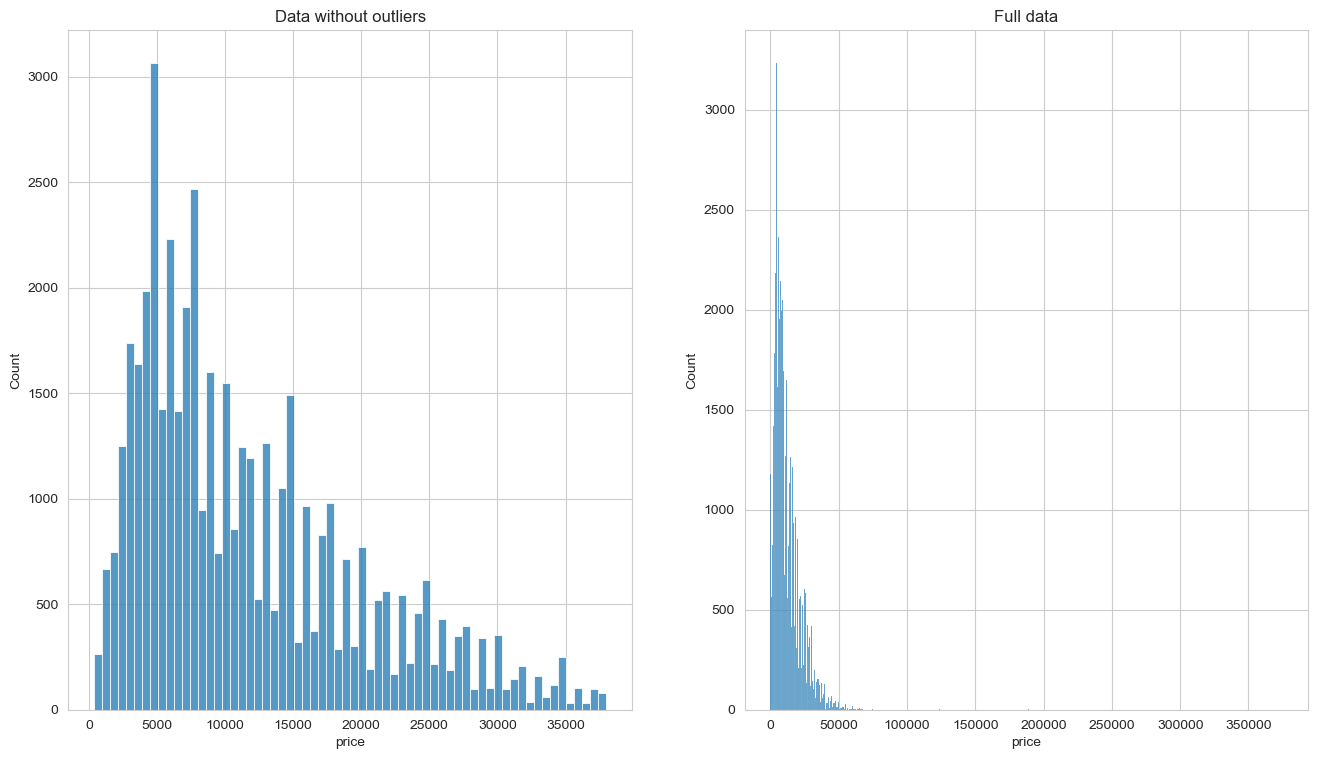

The distribution is skewed to the right
---------------------------------------
Statistics on: price
count    46447.000000
mean     11630.124098
std       8100.318069
min        372.000000
25%       5300.000000
50%       9000.000000
75%      15998.000000
max      37995.000000
Name: price, dtype: float64


The histogram of: age_when_posted


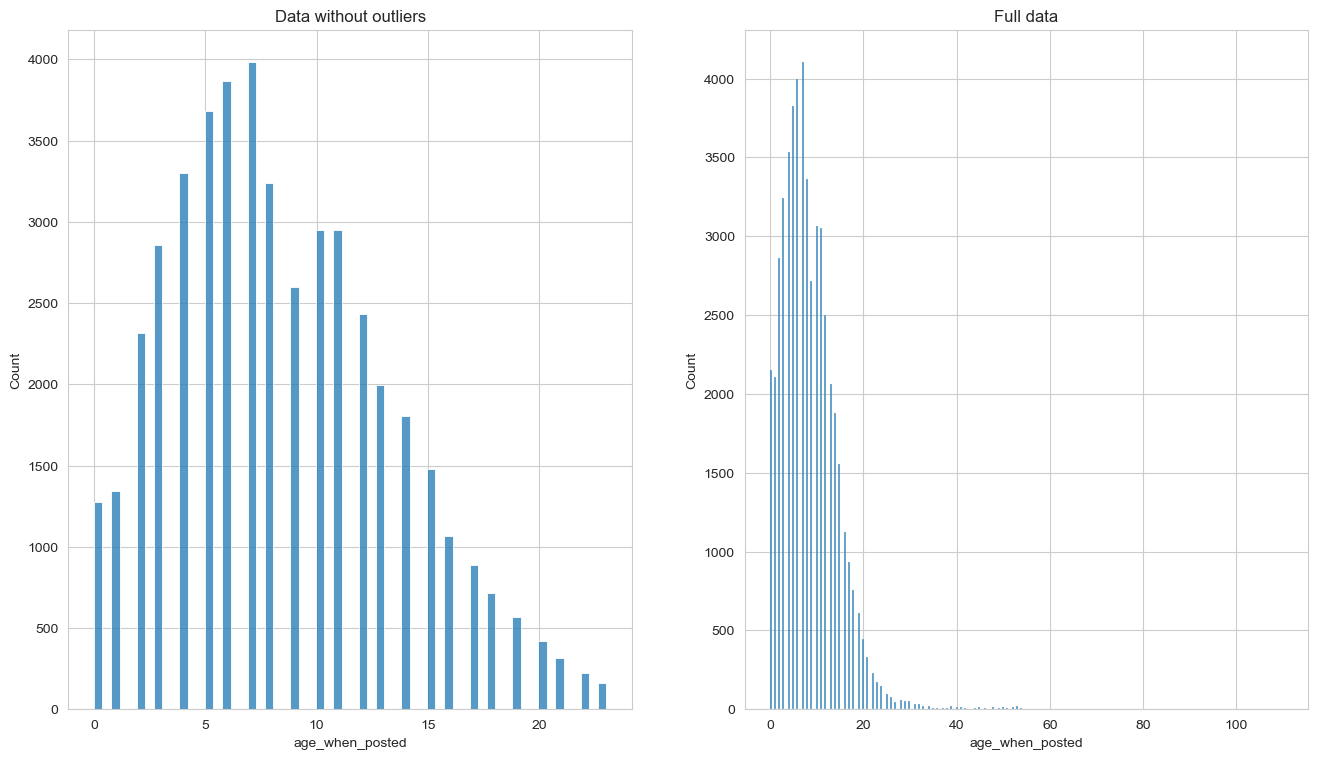

The distribution is skewed to the right
---------------------------------------
Statistics on: age_when_posted
count    46447.000000
mean         8.413138
std          4.958127
min          0.000000
25%          5.000000
50%          8.000000
75%         12.000000
max         23.000000
Name: age_when_posted, dtype: float64


The histogram of: avg_mile_year


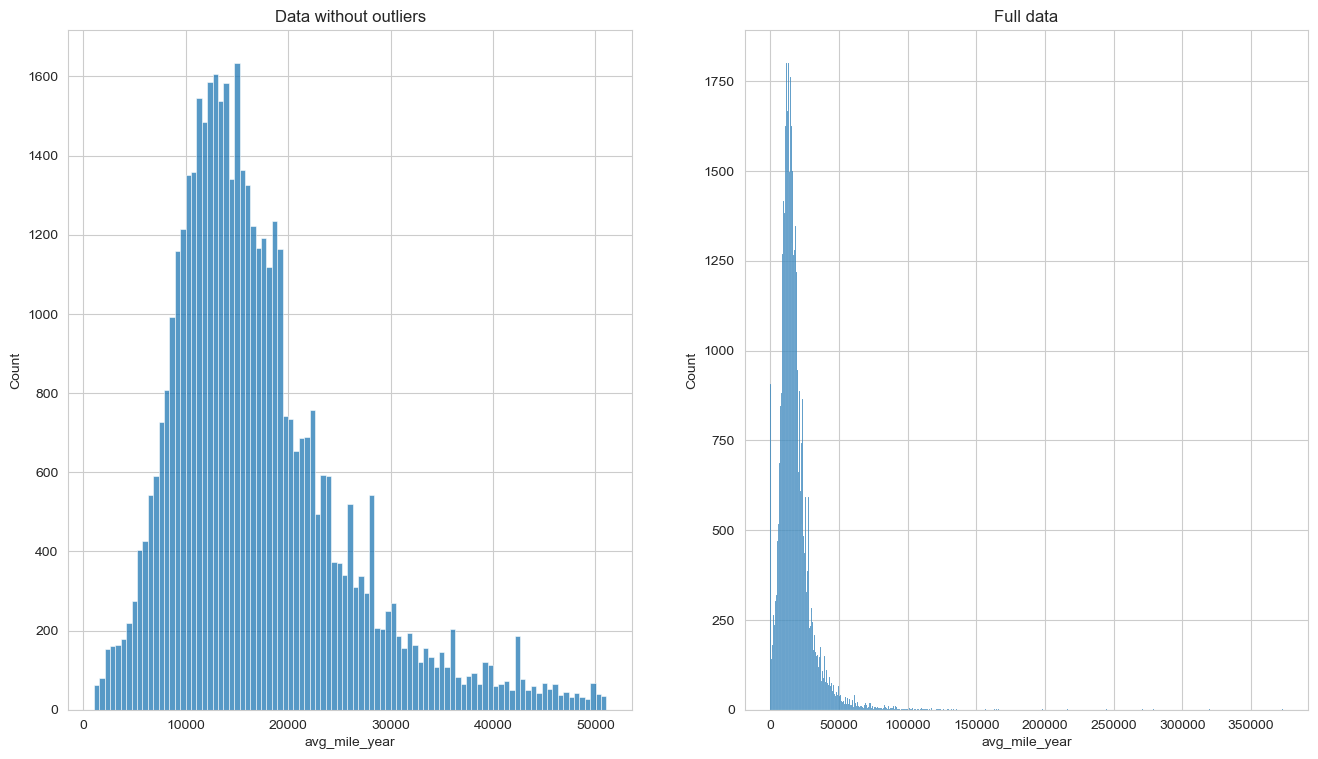

The distribution is skewed to the right
---------------------------------------
Statistics on: avg_mile_year
count    46447.000000
mean     17050.076539
std       8497.615318
min       1033.000000
25%      11274.000000
50%      15275.000000
75%      20833.000000
max      51073.000000
Name: avg_mile_year, dtype: float64


The histogram of: cylinders


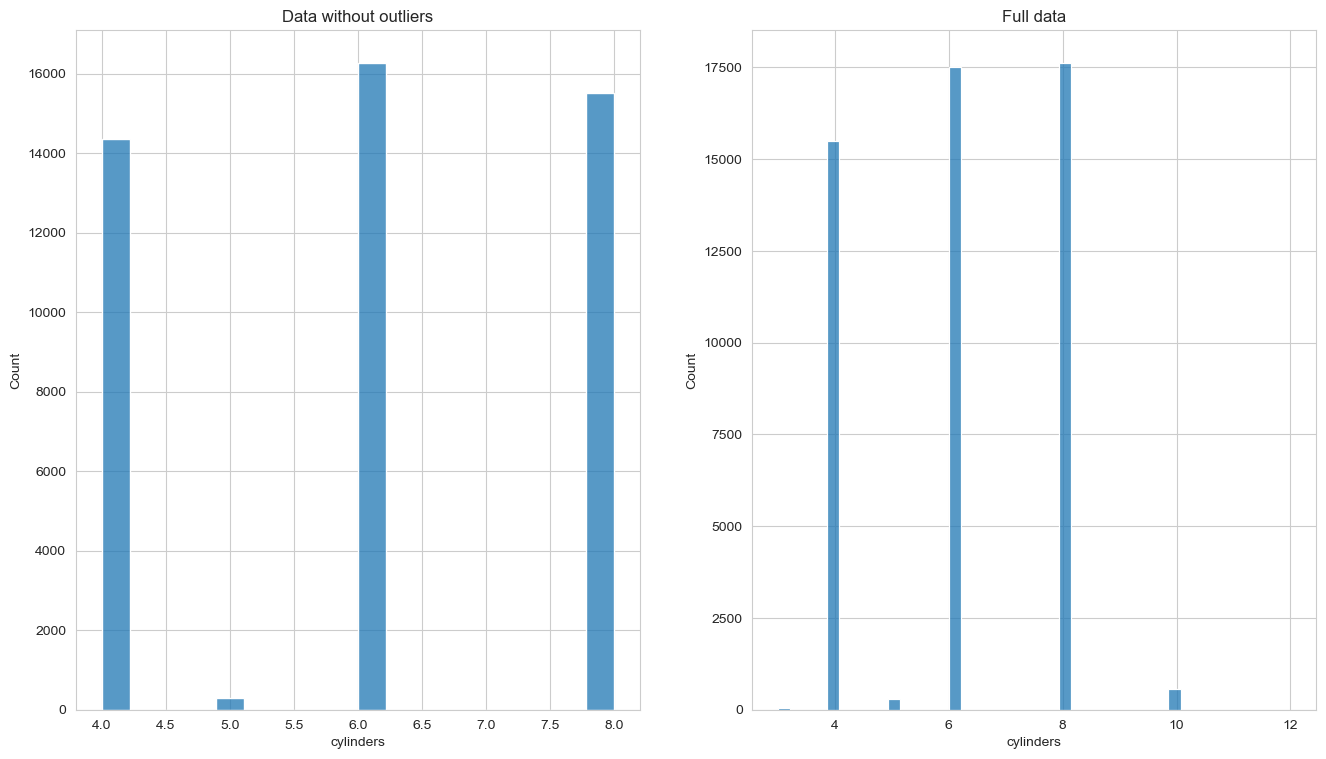

The distribution is skewed to the right
---------------------------------------
Statistics on: cylinders
count    46447.000000
mean         6.043878
std          1.605486
min          4.000000
25%          4.000000
50%          6.000000
75%          8.000000
max          8.000000
Name: cylinders, dtype: float64


The histogram of: condition_id


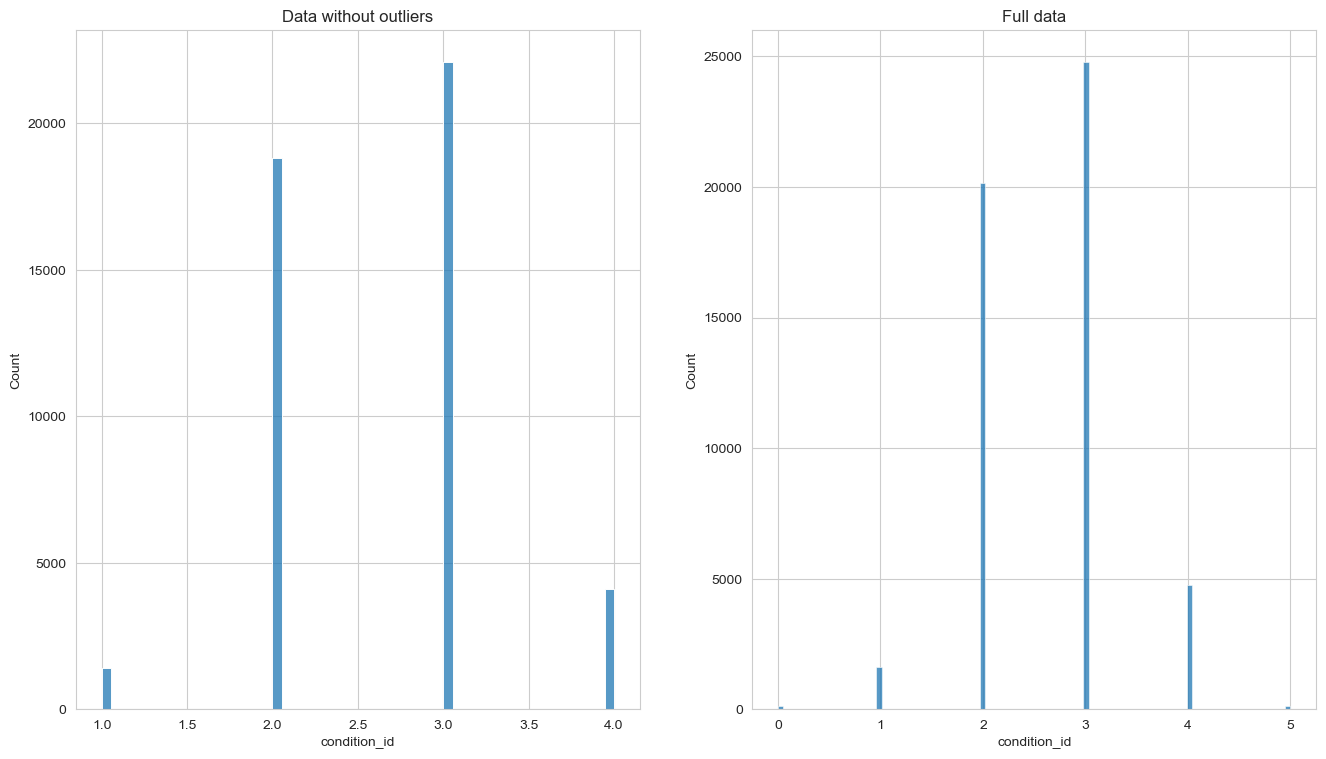

The distribution is skewed to the left
---------------------------------------
Statistics on: condition_id
count    46447.000000
mean         2.622602
std          0.687948
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          4.000000
Name: condition_id, dtype: float64




In [51]:
list_parameters = ['price', 'age_when_posted', 'avg_mile_year', 'cylinders', 'condition_id']

for i in list_parameters:
    compare_without_otliers(i)
    print()
    print()

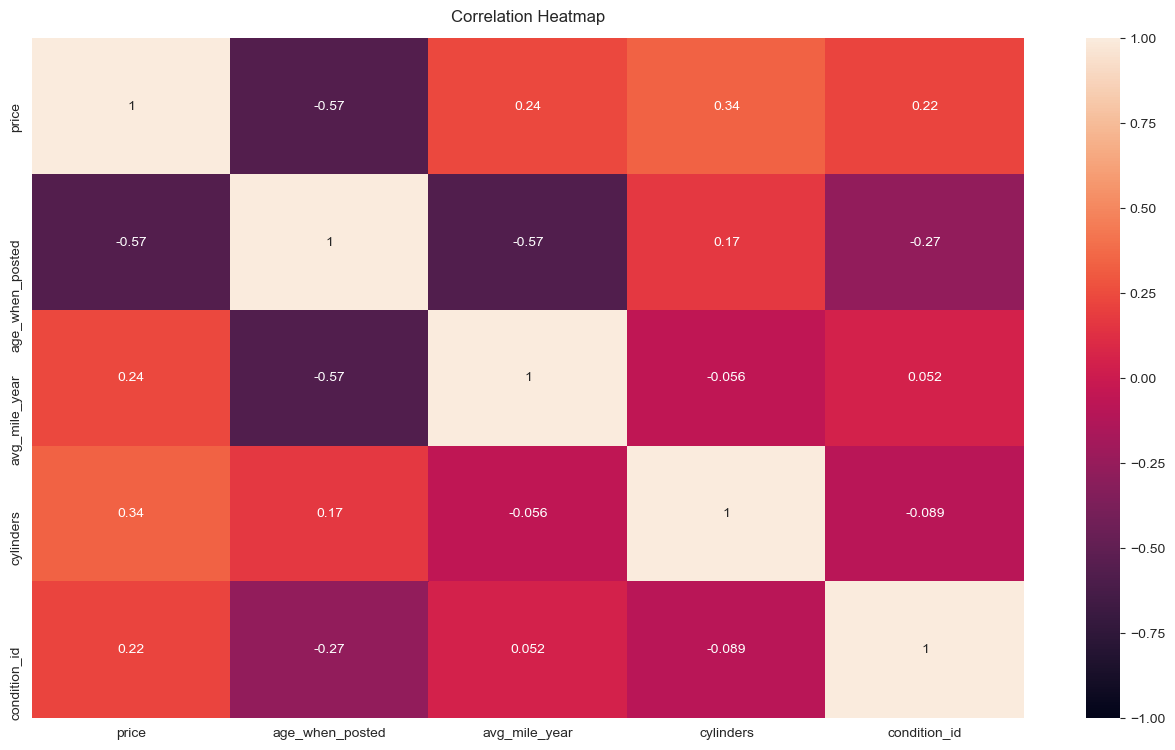

In [52]:
figure(figsize=(16, 9), dpi=100)
heatmap = sns.heatmap(good_df[['price', 'age_when_posted', 'avg_mile_year', 'cylinders', 'condition_id']].corr(), vmin=-1, vmax=1, annot=True) 
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

**Conclusion**

Graphs and data show that data without outliers, for all parameters there was an approximation of the mean to the median.
In addition, the heatmap showed an increase in the negative correlation of the price with the car's age (-0.41 to -0.57) and a correlation of the car's age with mileage (-0.48 to -0.57). Older car, with less ride on it.\
And the increase in a positive correlation between the price and the cylinders (0.4 to 0.34).

## Ads lifetime

For ad lifetime analysis, I will continue to use **good_df**. This will not distort the result, since good_df is a sample from the general population **df**, which means it will repeat the distribution.\
This is easy to check if you display the average and median for each of them and compare.

In [53]:
df.days_listed.mean()
good_df.days_listed.mean()
outliers_df.days_listed.mean()

df.days_listed.median()
good_df.days_listed.median()
outliers_df.days_listed.median()

39.55475982532751

39.568626606669966

39.42792437967704

33.0

33.0

33.0

Perfect. And now - back to exploratory.

<Figure size 1600x900 with 0 Axes>

[Text(0.5, 1.0, 'The histogram of: days_listed')]

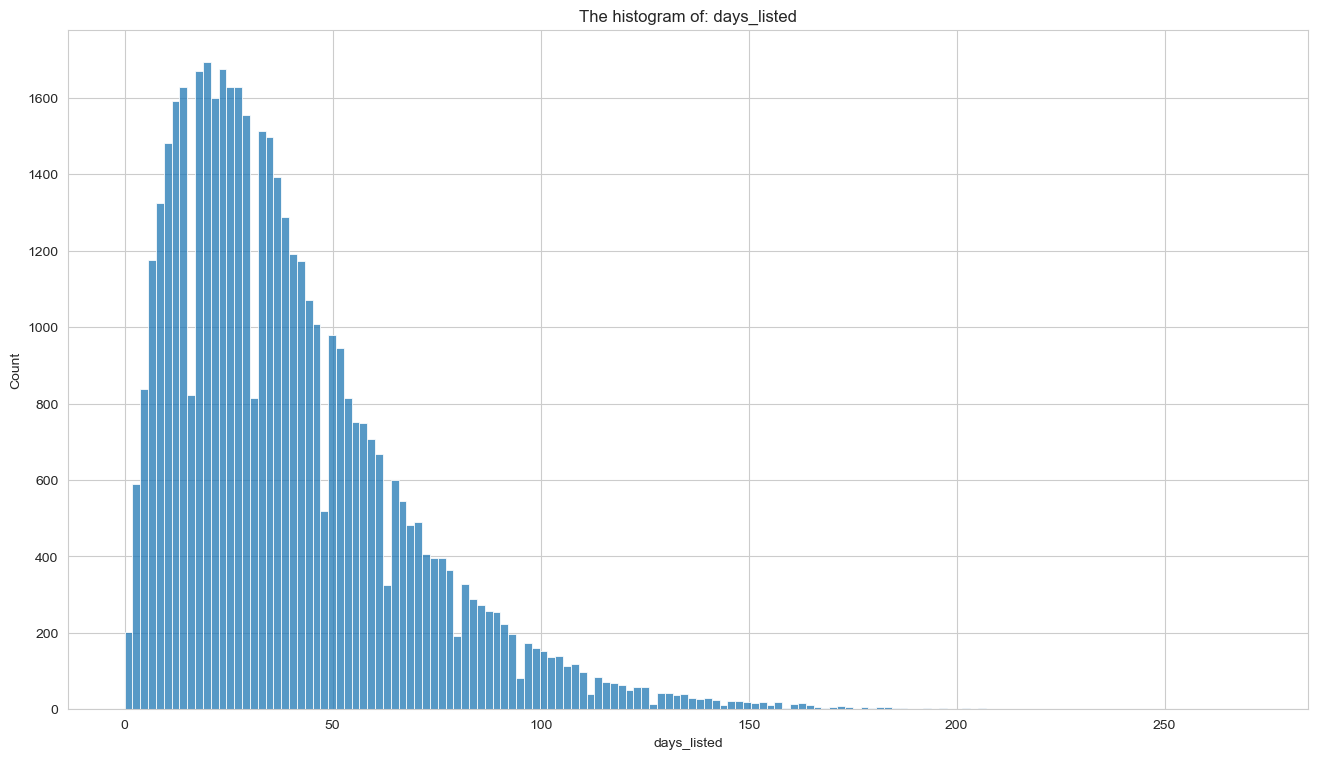

The distribution is skewed to the right
---------------------------------------
Statistics on: days_listed
count    46447.000000
mean        39.568627
std         28.240053
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64
---------------------------------------
min border: 4.0
max border: 115.0
---------------------------------------
The outliers are considered to be values below 4.0 and above 115.0
We have 1704 values that we can consider outliers


In [54]:
sns.set_style("whitegrid")
figure(figsize=(16, 9), dpi=100)
sns.histplot(good_df.days_listed).set(title='The histogram of: days_listed')
plt.show()
if good_df.days_listed.mean()>good_df.days_listed.median():
    print('The distribution is skewed to the right')
else:
    print('The distribution is skewed to the left')
print('---------------------------------------')
print('Statistics on: {}'.format('days_listed'))
print(good_df.days_listed.describe())
ninety_eight = np.percentile(good_df.days_listed, 98)
two = np.percentile(good_df.days_listed, 2)
print('---------------------------------------')
print('min border:',two)
print('max border:',ninety_eight)
print('---------------------------------------')
print('The outliers are considered to be values below',two, "and above",ninety_eight)
print('We have',len(good_df[(good_df.days_listed<two)|(good_df.days_listed>ninety_eight)]),"values that we can consider outliers")

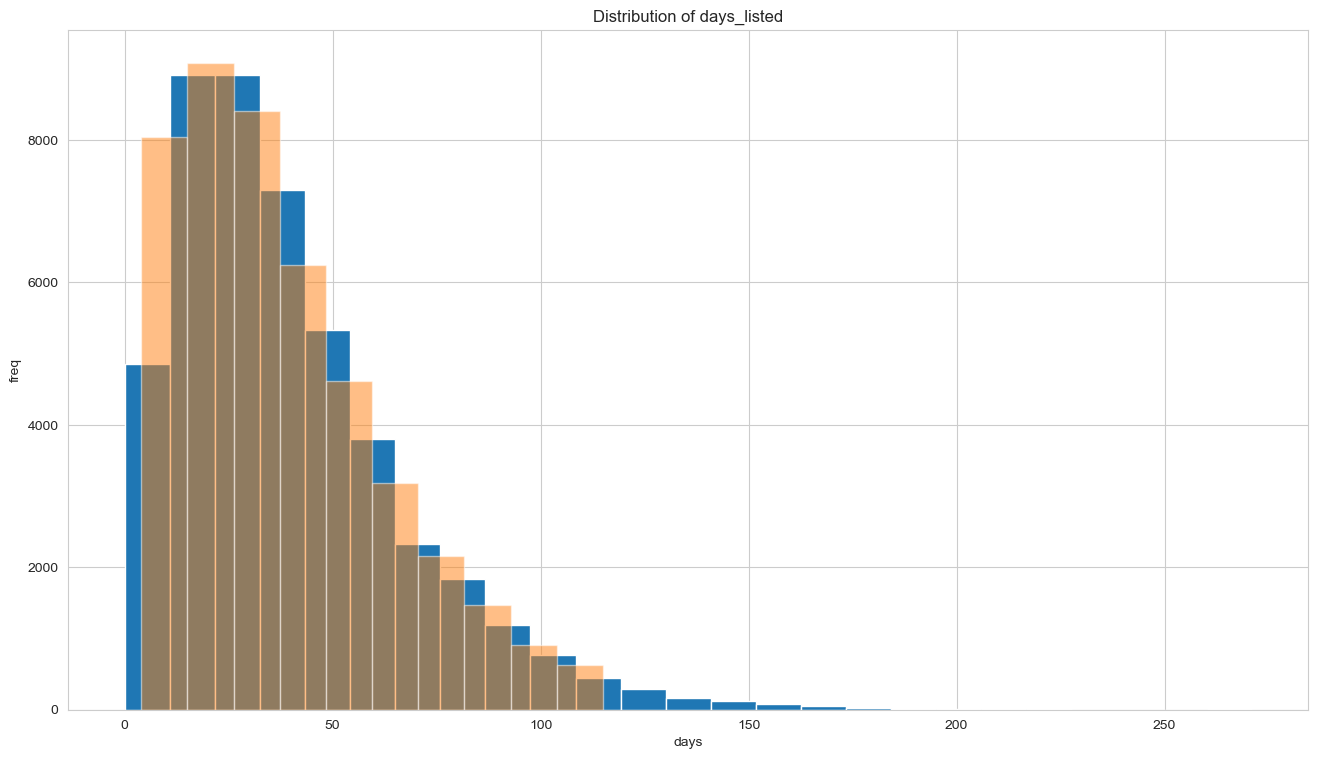

In [55]:
# let's take out the outliers and compare two histogram

figure(figsize=(16, 9), dpi=100)
good_df.days_listed.hist(bins = 25)
good_df.query('4<= days_listed <= 115').days_listed.hist( alpha = 0.5)
plt.title('Distribution of days_listed')
plt.xlabel('days')
plt.ylabel('freq');

In [56]:
# and now - check the correlation.

good_df.corr()

,price,model_year,cylinders,is_4wd,days_listed,month_posted,year_posted,age_when_posted,avg_mile_year,condition_id,id
price,1.000000,0.571022,0.339086,0.361241,-0.002448,-0.013780,0.013442,-0.568902,0.239981,0.218942,-0.015836
model_year,0.571022,1.000000,-0.170936,-0.022016,0.000714,-0.030370,0.030486,-0.995640,0.562996,0.273463,-0.020233
cylinders,0.339086,-0.170936,1.000000,0.411550,0.001605,0.004642,-0.005036,0.170207,-0.056399,-0.088615,0.004348
is_4wd,0.361241,-0.022016,0.411550,1.000000,0.003118,0.005265,-0.004336,0.021578,0.034732,-0.001957,0.003784
days_listed,-0.002448,0.000714,0.001605,0.003118,1.000000,-0.008656,0.010089,0.000229,0.000907,0.000670,0.007974
month_posted,-0.013780,-0.030370,0.004642,0.005265,-0.008656,1.000000,-0.819180,-0.046123,0.107332,-0.007466,-0.003553
year_posted,0.013442,0.030486,-0.005036,-0.004336,0.010089,-0.819180,1.000000,0.062881,-0.130208,0.007133,-0.000404
age_when_posted,-0.568902,-0.995640,0.170207,0.021578,0.000229,-0.046123,0.062881,1.000000,-0.574294,-0.272383,0.020165
avg_mile_year,0.239981,0.562996,-0.056399,0.034732,0.000907,0.107332,-0.130208,-0.574294,1.000000,0.051901,-0.003783
condition_id,0.218942,0.273463,-0.088615,-0.001957,0.000670,-0.007466,0.007133,-0.272383,0.051901,1.000000,0.000880


We have no one real correlation, but the closer was parameter year_posted.

**Conclusion**

A lifetime of ads.

Half of all ads live 33 days, although the average is higher at 39 days. This tells us that after 39 days, ad life increases dramatically, and this is a reason to wonder how relevant it is to the market. In general, most ads live from 4 to 115 days.\
!BUT\
All lifetime values are in the range of 0 to 271 days. Therefore, we can highlight:

- a short life period from 0 to 4 days 
- a period of long life from 115 to 271 days.

Exploring the data further, I decided to look at what parameters the lifetime is correlated with. It turned out that there is no strong correlation with no one parameter, but the year of publication turned out to be the strongest among all. This can be explained by the increase in the total number of ads year after year.

## Average price per each type of vehicle

In [57]:
avg_price_count = good_df.query('4<= days_listed <= 115').pivot_table(index = 'type', values = 'price', aggfunc = ['mean', 'count'])
avg_price_count = avg_price_count.reset_index()
avg_price_count.columns = (['type', 'avg_price', 'quantity_ads'])
avg_price_count.sort_values(by = 'quantity_ads', ascending = False)
print('----------------------------------------')
avg_price_count.avg_price.corr(avg_price_count.quantity_ads)
print('----------------------------------------')

,type,avg_price,quantity_ads
0,SUV,10855.363338,10976
9,sedan,7014.661268,10867
10,truck,15791.806002,10330
8,pickup,15409.109728,6106
3,coupe,14140.913896,1835
12,wagon,9017.288087,1385
5,mini-van,7872.194366,1065
4,hatchback,6889.830769,910
11,van,10472.467857,560
2,convertible,13279.174194,310


----------------------------------------


0.0824033864861441

----------------------------------------


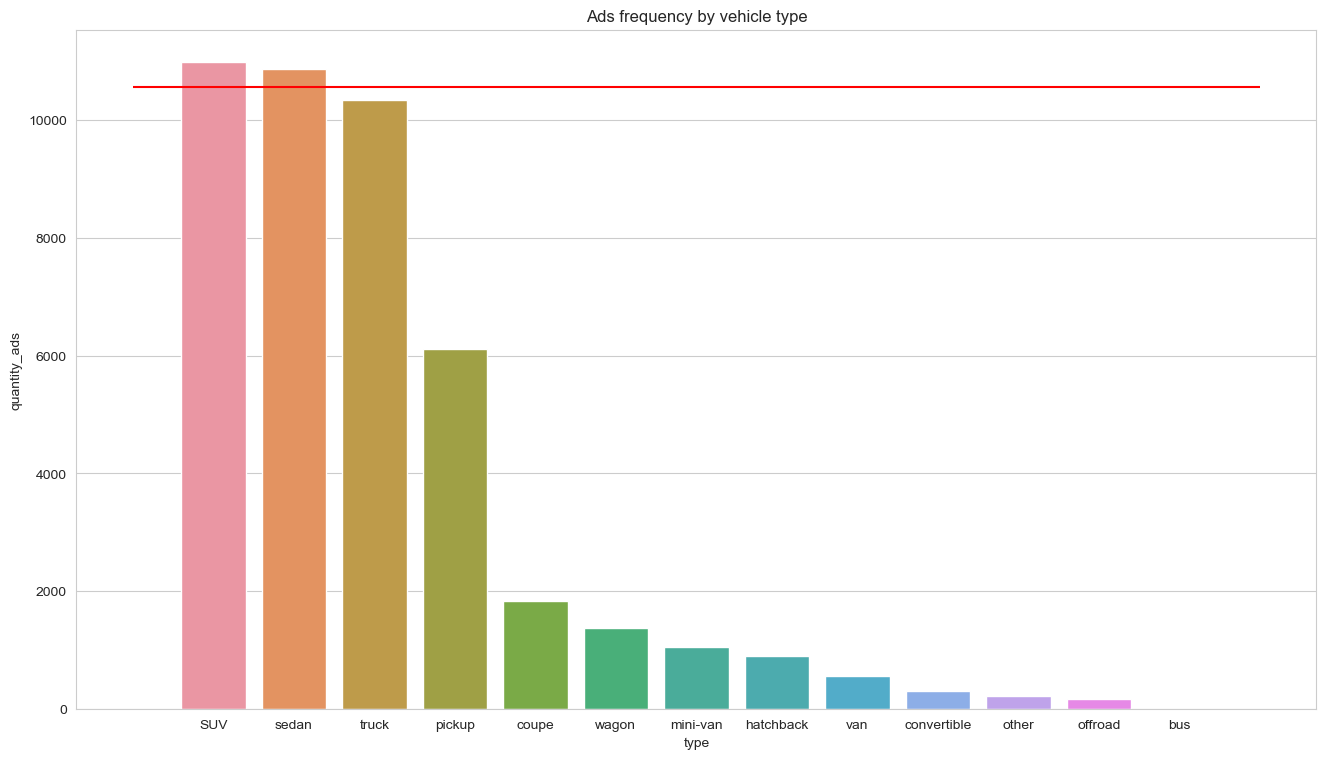

In [58]:
sns.set_style("whitegrid")
figure(figsize=(16, 9), dpi=100)
sns.barplot(data = avg_price_count, x = 'type', y = 'quantity_ads', order=avg_price_count.sort_values('quantity_ads', ascending = False).type ).set(title = 'Ads frequency by vehicle type')
#let's add a limit line
plt.hlines(y = 10550, xmin = -1, xmax = 13, colors = 'red');

**Explanation.**

To analyze the relationship between the average price, the type of car, and the number of ads, I created a pivot table avg_price_count. It visually shows that there is no connection between the average price and the number of ads. This was also confirmed by a small correlation coefficient (0.083).\
I needed to graphically display how often each type of car appears in ads, so I chose the chart bar. He graphically showed that most often they create ads for **SUV** (10940) and **sedan** (10910).

## Price factors

So, based on the data of two types of cars (SUV and sedan), we examine the correlation between **price** and **age**, **mileage**, **condition**, **transmission**, and **paint color**.

,price,age_when_posted,avg_mile_year,condition_id
price,1.000000,-0.649580,0.300769,0.297924
age_when_posted,-0.649580,1.000000,-0.620505,-0.312224
avg_mile_year,0.300769,-0.620505,1.000000,0.062586
condition_id,0.297924,-0.312224,0.062586,1.000000


<Figure size 1600x900 with 0 Axes>

Text(0.5, 1.0, 'Correlation Heatmap')

Text(0.5, 0.98, 'Pairplot of age, mileage and conditions')

----------------------------------------


automatic    10852
manual         457
other           88
Name: transmission, dtype: int64

other     2043
black     1983
white     1801
silver    1466
grey      1104
blue       955
red        854
green      401
brown      357
custom     273
orange      76
yellow      45
purple      39
Name: paint_color, dtype: int64

----------------------------------------


<Figure size 800x800 with 0 Axes>

[Text(0.5, 1.0, 'Box plot of transmission')]

<Figure size 800x800 with 0 Axes>

[Text(0.5, 1.0, 'Box plot of paint colors')]

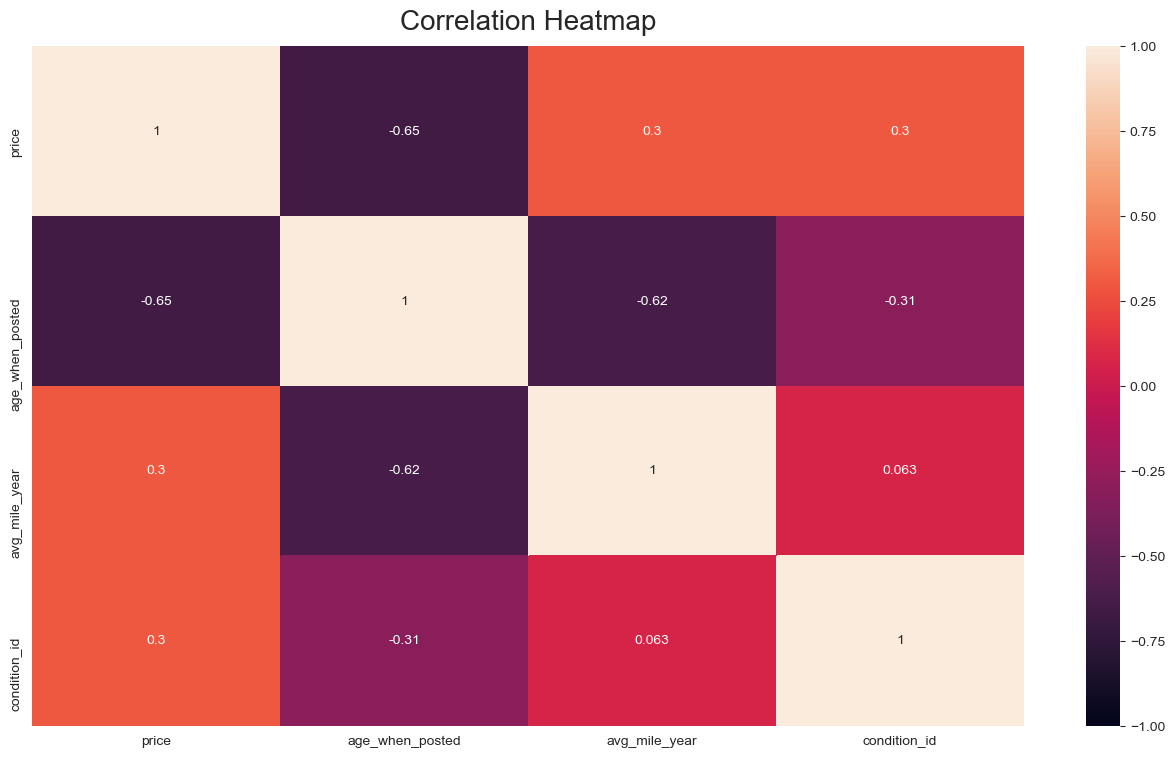

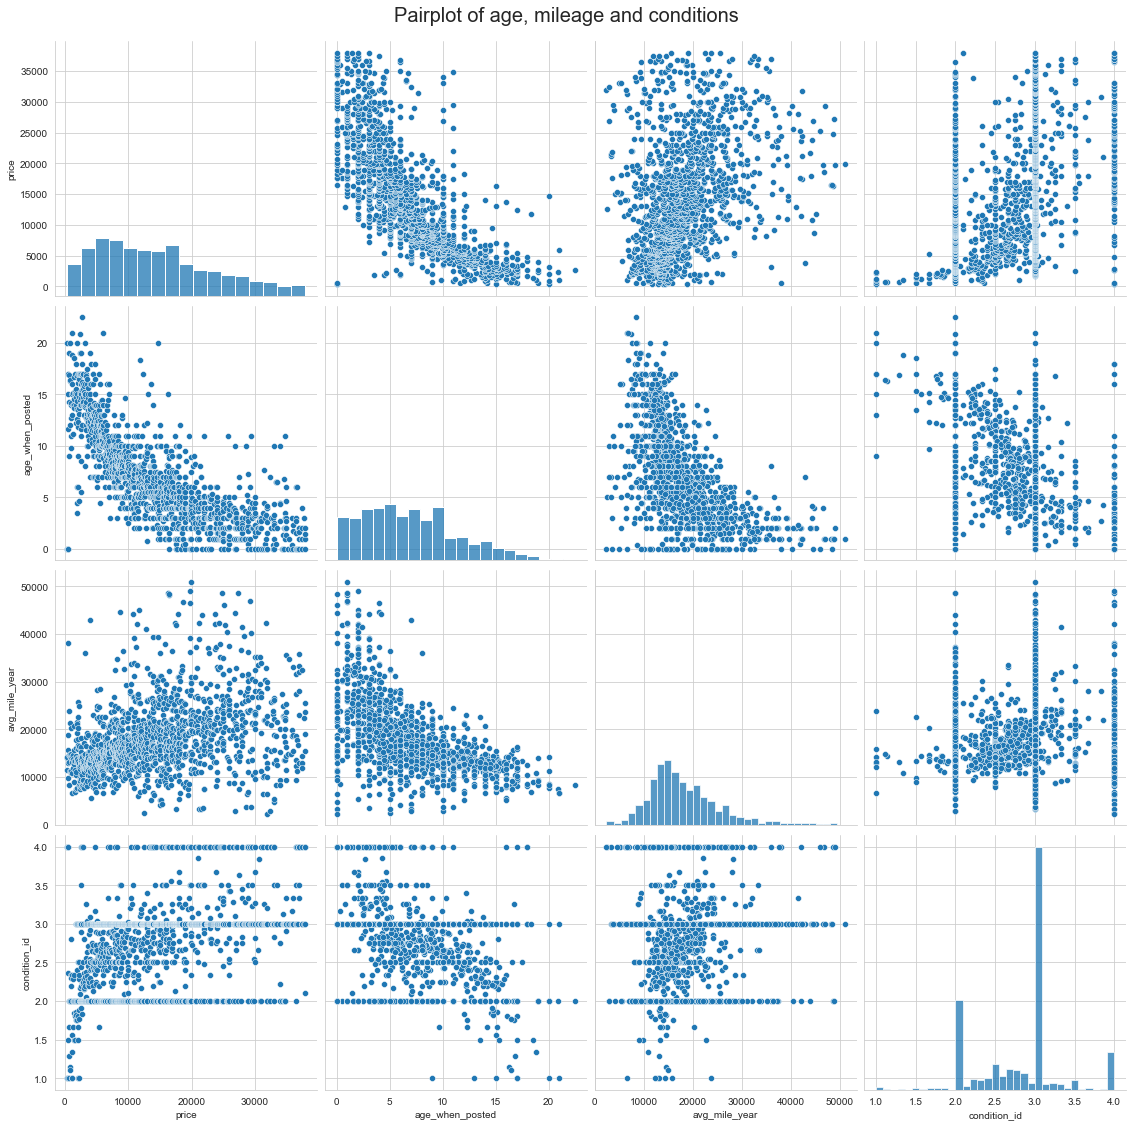

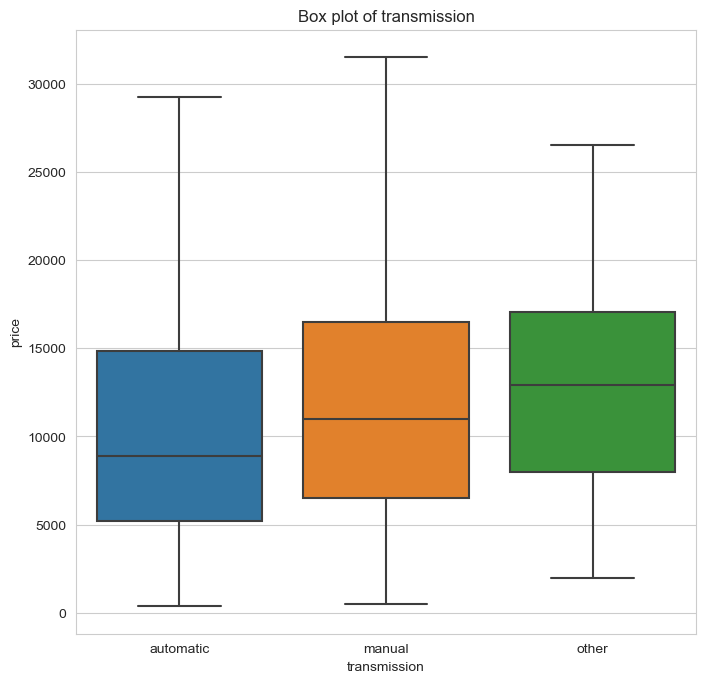

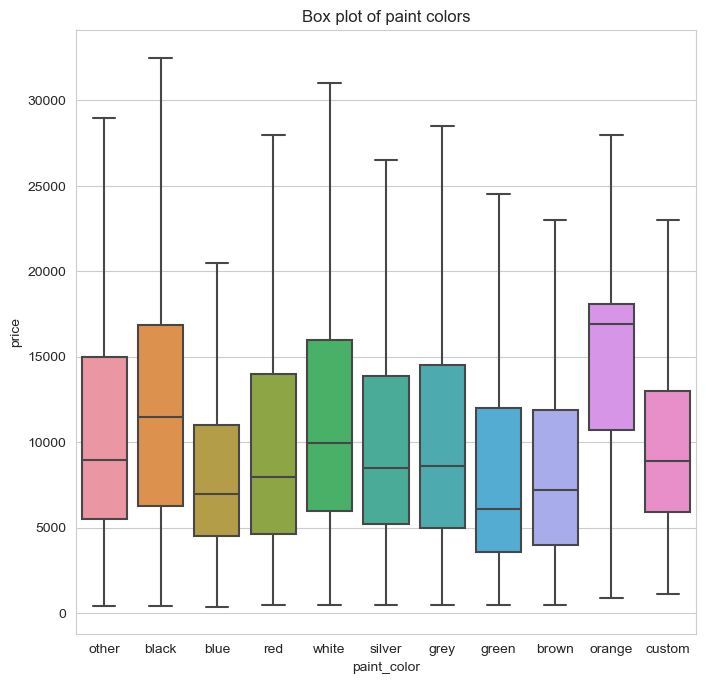

In [59]:
# let's make a new dataset, matrix of correlation, heatmap, and scatter matrix for analysis.
suv = good_df.query('type == "SUV"')[['price','age_when_posted', 'avg_mile_year', 'condition_id', 'transmission', 'paint_color']]
suv.corr()

figure(figsize=(16, 9), dpi=100)
heatmap = sns.heatmap(suv.corr(), vmin=-1, vmax=1, annot=True) 
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12)

price_suv = suv.pivot_table(index = 'price', values = ['age_when_posted', 'avg_mile_year', 'condition_id']).reset_index()
#figure(figsize=(14, 14), dpi=100)
rel = sns.pairplot(price_suv, height = 4)
rel.fig.subplots_adjust(top= .95)
rel.fig.suptitle('Pairplot of age, mileage and conditions', fontsize = 20)

print('----------------------------------------')
# check the number of ads for every type of transmission and every color.
suv.transmission.value_counts()
suv.paint_color.value_counts()
print('----------------------------------------')

# let's make a boxplot for categorical parameters.

figure(figsize=(8, 8), dpi=100)
sns.boxplot(data=suv, x="transmission", y="price", showfliers = False).set(title = 'Box plot of transmission')


figure(figsize=(8, 8), dpi=100)
sns.boxplot(data=suv.query('paint_color != "purple" and paint_color != "yellow"'),
            x="paint_color", y="price", showfliers = False).set(title = 'Box plot of paint colors')

**SUV**

Based on the correlation table, I can say:
**Age** has a strong negative correlation (-0.62), which is logical. The older the car, the cheaper it should cost, other things being equal. Of course, the price of a vintage car should, on the contrary, rise, but in our dataset, such a car would be considered an outlier. And we removed all outliers.

**Mileage** - at first glance it shows a strange positive correlation (0.30).\
!BUT\
It must be remembered that this is an indicator of the average mileage for the year, and not the entire mileage. It has a strong negative correlation with car age (-0.62), which tells us that the older the car, the less it drives.\
Accordingly, the higher the average mileage, the younger the car, which means it costs more. So everything is correct.

**Condition** - there is a good positive correlation (0.30). It is not realy strong, but still good, to argue that the better the condition, the higher the price.

The scatter plot confirmed my conclusions based on the numbers.

Next, I explored the categorical parameters using a box plot.\
!But\
First, I checked the **ads** digit for each value of these parameters (should be at least 50 ). Two values were missing in the paint color:

- yellow 44
- purple 35

**Transmission** - on average (we look at the average price), a car with the oyher type costs more than a manual one. Manual, in turn, is on average more expensive than automatic, but the gaps between them are not large (about 2000).

**Color** - in general, color has little effect on the price, and for most colors, the average price value is in the range from 5000 to 10000. Yes, there is a very high value for the color orange, but this is most likely a temporary phenomenon, and it is just a color that is fashionable this season .

,price,age_when_posted,avg_mile_year,condition_id
price,1.000000,-0.681048,0.283887,0.328193
age_when_posted,-0.681048,1.000000,-0.585325,-0.297968
avg_mile_year,0.283887,-0.585325,1.000000,0.047602
condition_id,0.328193,-0.297968,0.047602,1.000000


<Figure size 1600x900 with 0 Axes>

Text(0.5, 1.0, 'Correlation Heatmap')

Text(0.5, 0.98, 'Pairplot of age, mileage and conditions')

----------------------------------------


automatic    10641
manual         554
other           65
Name: transmission, dtype: int64

other     2030
silver    1921
black     1633
grey      1519
white     1374
blue      1158
red        867
custom     255
brown      250
green      198
purple      26
yellow      21
orange       8
Name: paint_color, dtype: int64

----------------------------------------


<Figure size 800x800 with 0 Axes>

[Text(0.5, 1.0, 'Box plot of transmission')]

<Figure size 800x800 with 0 Axes>

[Text(0.5, 1.0, 'Box plot of paint colors')]

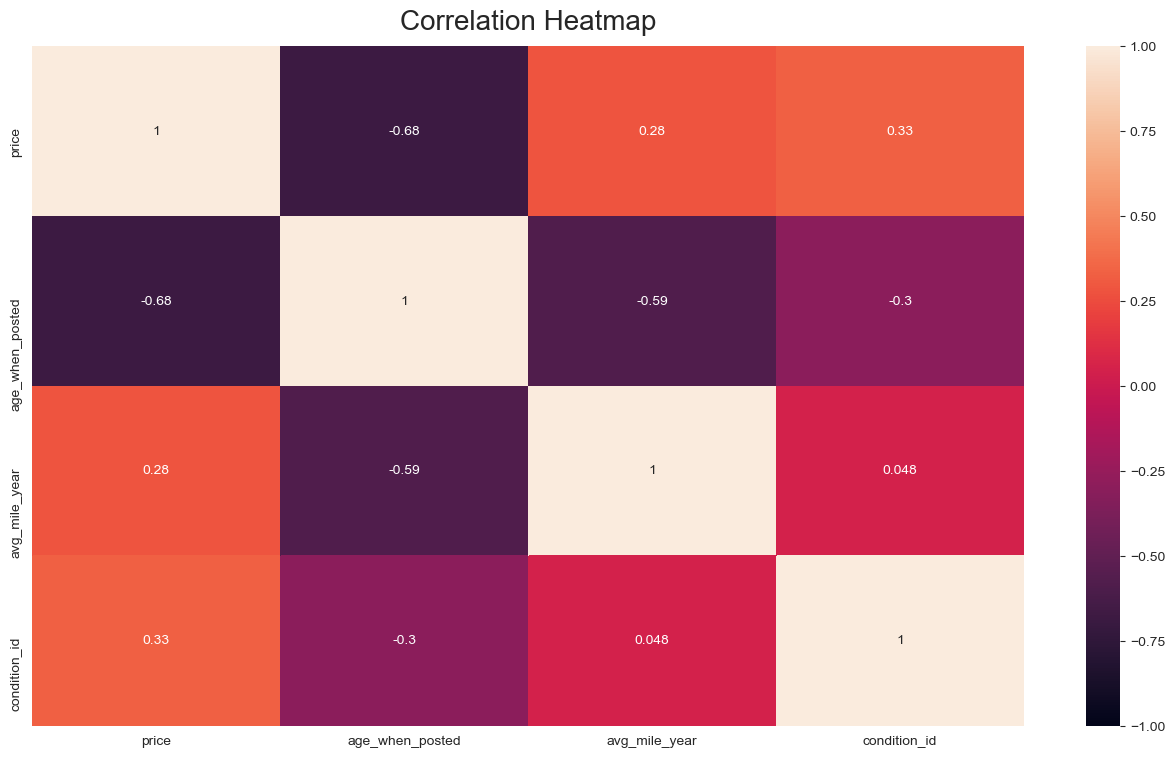

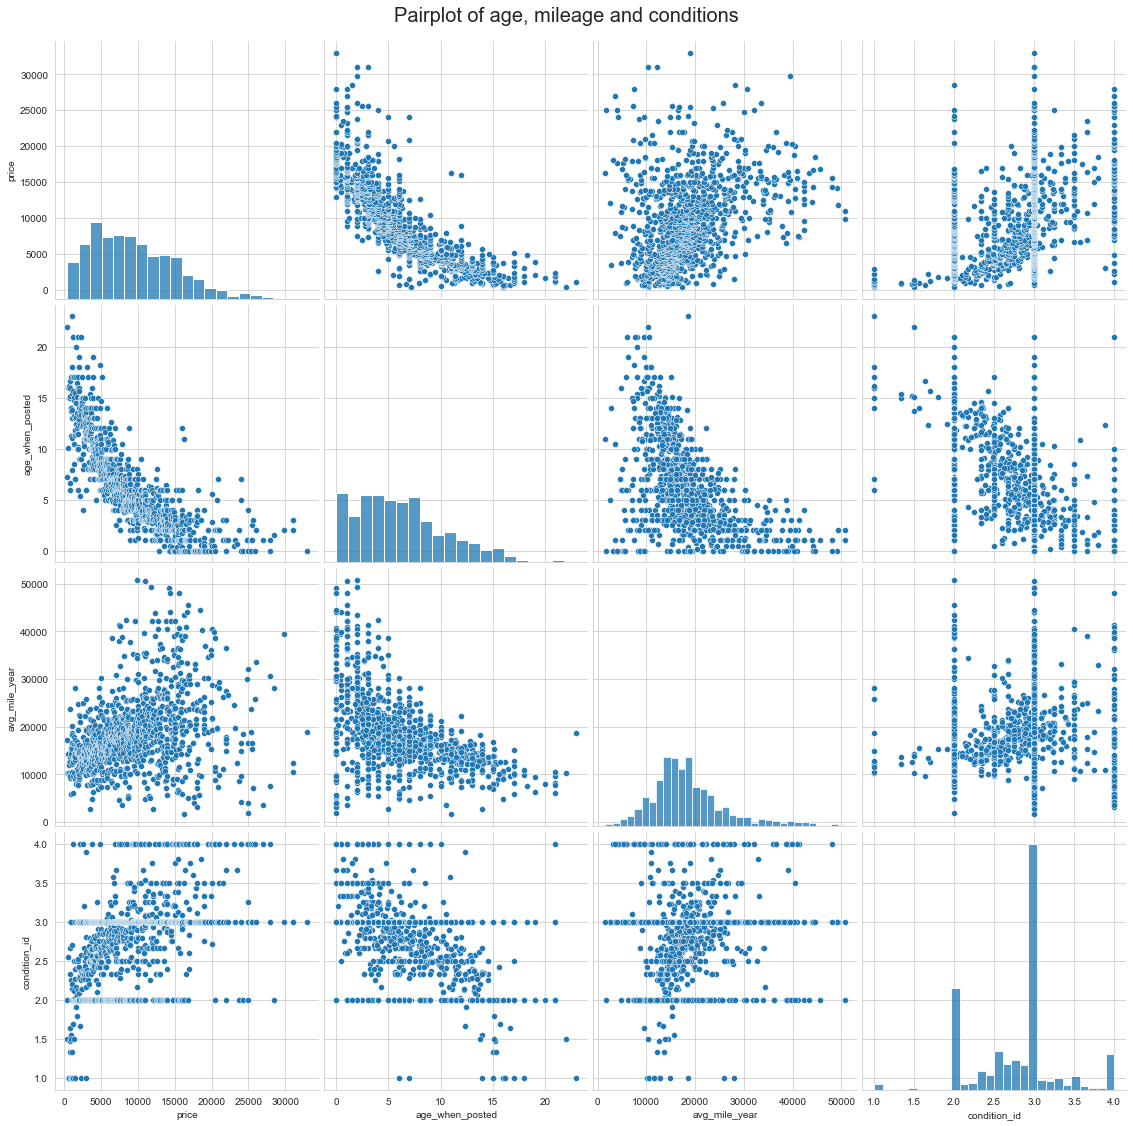

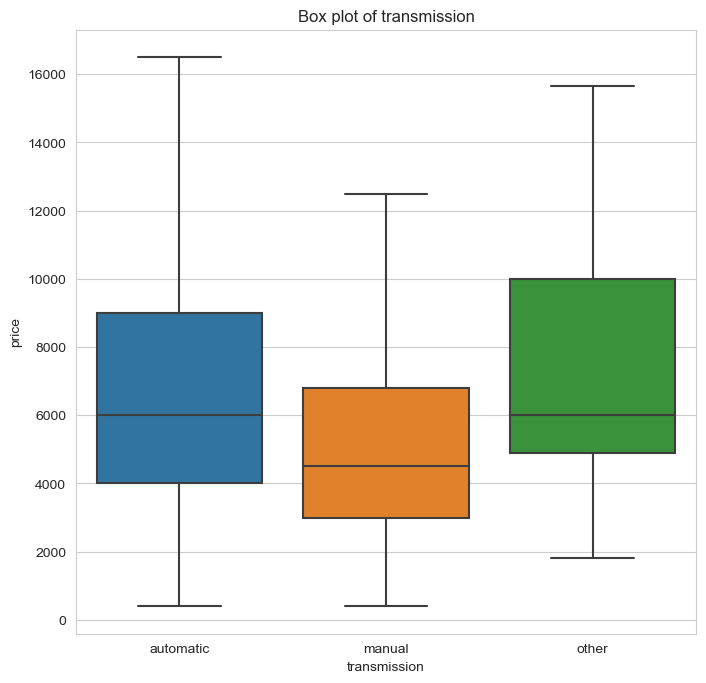

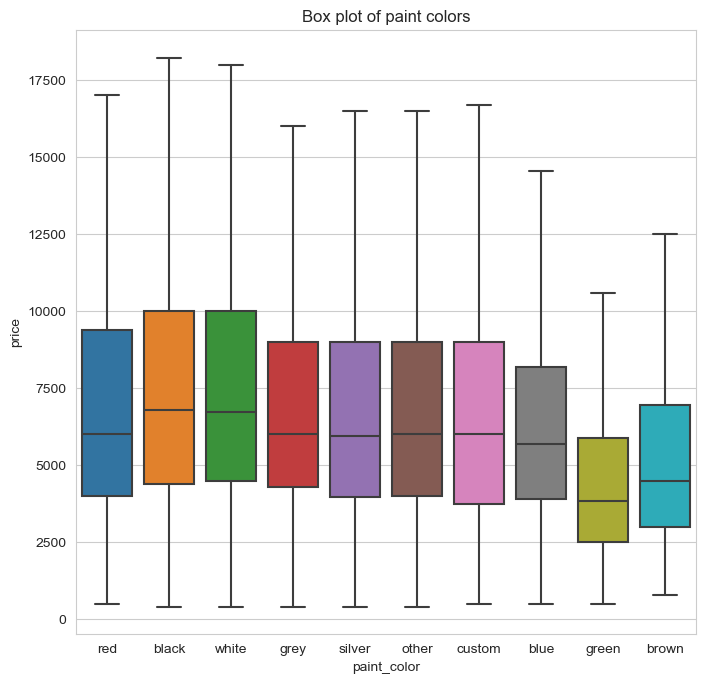

In [60]:
# let's make a new dataset, matrix of correlation, heatmap, and scatter matrix for analysis.
sedan = good_df.query('type == "sedan"')[['price','age_when_posted', 'avg_mile_year', 'condition_id', 'transmission', 'paint_color']]
sedan.corr()

figure(figsize=(16, 9), dpi=100)
heatmap = sns.heatmap(sedan.corr(), vmin=-1, vmax=1, annot=True) 
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12)

price_sedan = sedan.pivot_table(index = 'price', values = ['age_when_posted', 'avg_mile_year', 'condition_id']).reset_index()
#figure(figsize=(14, 14), dpi=100)
rel = sns.pairplot(price_sedan, height = 4)
rel.fig.subplots_adjust(top= .95)
rel.fig.suptitle('Pairplot of age, mileage and conditions', fontsize = 20)

print('----------------------------------------')
# check the number of ads for every type of transmission and every color.
sedan.transmission.value_counts()
sedan.paint_color.value_counts()
print('----------------------------------------')

# let's make a boxplot for categorical parameters.

figure(figsize=(8, 8), dpi=100)
sns.boxplot(data=sedan, x="transmission", y="price", showfliers = False).set(title = 'Box plot of transmission')


figure(figsize=(8, 8), dpi=100)
sns.boxplot(data=sedan.query('paint_color != "purple" and paint_color != "yellow" and paint_color != "orange"'),
            x="paint_color", y="price", showfliers = False).set(title = 'Box plot of paint colors')

**Sedan.**

In comparison with SUV, the sedan has more strong negative correlation price with **age** (-0.68) and more strong positive correlation price with **condition** (0.33). It's can tell what drivers of sedans more focused on comfort.\
The **mileage** showed a less strong positive correlation with price (0.28) and less negative correlation with age (-0.58). Probably, drivers used them a little bit more in common life.

As for the **transmission**, the average price of an automatic and other transmission is almost the same, while a manual one is lower. This tells us again that drivers of sedans still love comfort more.

Three values had to be removed in the **paint color** parameter:

- purple 25
- yellow 21
- orange 9

In general, the average price is still in the range of 5000 - 7500, but two colors have gone down:

- brown
- green

But in general, from my point of view, the paint color cannot be used to predict the price.

**Conclusion.**

The price is well influenced by the age of the car. The older car, the cheaper it will cost.\
Condition and average mileage per year also affects the price of a car but at another side. A new, or how a new car will cost more.\
As for the transmission - then it is worth looking at the type of car. Sometimes an automatic is more expensive, and sometimes a manual. But of course, this parameter also affects the price.\
But I would not mess with the color, the values overlap too much with each other. In addition, the color is not standardized between different manufacturers, and the green color of a Ford will be different from the green color of a Mercedes.

## General conclusion

It's been a long journey :)\
First, we determined which parameters have missing values (is_4wd, paint_color, odometer, cylinders, model_year.) and whether the correct data type is specified everywhere (not in model_year, cylinders, odometer, is_4wd, and date_posted). They searched for duplicates - but did not find them, but found that many parameters have large outliers.\
Next, we moved on to working with missing data.\
To populate model_year, we calculated the median of the year for each model. Then we checked the model name for implicit duplicates and removed them too.\
To fill the cylinders, we calculated the average value of the cylinders for grouping: model - model year.\
To populate the odometer, we used the median mileage for the age-condition group.\
To fill paint_color, we used the color of another.\
is_4wd was the easiest. We quickly realized that this value is a boolean, and simply filled in all the empty spaces of the value 0.

At the next stage of the project, we added the parameters day, month, and year. We calculated the age of the car at the time of publication of the ad and the average mileage per year for each ad.
We also created a digital scale for the condition parameter.

After that, we began to study the data. We looked at the distribution of parameters, for each we deduced the minimum and maximum limits for emissions using 2 and 98 percentiles.\
After that, two new datasets were created: an outlier dataset and a dataset without outliers.\
Immediately, without stopping, we studied the data without outliers and compared the distribution graphs of data sets with and without outliers.

In the next stage, we studied the lifetime of the ad. They found out that on average one lives 33 days, although half-lives 39. That the usual life expectancy is from 4 to 115 days\
!BUT\
there are ultra-short ads from 0 to 3 days and extra-long ads from 116 to 271 days.

Next, we calculated the average price for each type of car and the frequency of ads for their sale. We found out that most often they submit ads for the sale of cars such as SUVs or sedans.

Using these two most popular types of cars, we found out that the price is affected by:
- car age
- mileage (average mileage for the year)
- condition
- transmission.

But color is not a predictor.

The data obtained allow me to answer the question of what data affects the price and advance in a career at Crankshaft List.